In [1]:
import pymc3 as pm
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from arviz.utils import Numba
Numba.disable_numba()
Numba.numba_flag

C:\Users\user\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


False

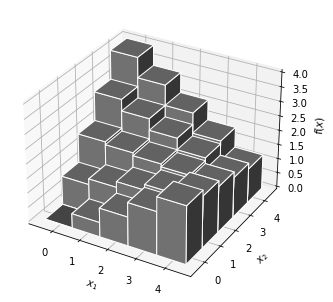

In [2]:
fig = plt.figure()
ax = Axes3D(fig)

size = 5
_x1, _x2 = np.meshgrid(np.arange(size), np.arange(size))

x1, x2 = _x1.ravel(), _x2.ravel()

f = lambda x1, x2: 0.5 * x1 + x2 - 0.3 * x1 * x2
ax.bar3d(x1, x2, 0, 1, 1, f(x1, x2), color='gray', edgecolor='white', shade=True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')
plt.xticks(np.arange(0.5, size, 1), range(size))
plt.yticks(np.arange(0.5, size, 1), range(size))
plt.show()

In [3]:
# 등산 오르기 알고리즘

def is_valid(x):
    """ 실행 가능 솔루션임을 확인한다. """
    return all( -1 < i < size for i in list(x) )


class HillClimbing:
    """ 등산 오르기 알고리즘
    
        Args: 
            init_x : 초기 솔루션
            init_f : 초기 솔루션의 평갓값
            
        Attributes:
            current_x : 현재 솔루션
            current_f : 현재 솔루션의 평갓값    
    
    """
    
    def __init__(self, init_x, init_f):
        self.current_x = init_x
        self.current_f = init_f
        
    def get_neighbors(self):
        """ 근방 솔루현 출력.
            Returns: 근방 솔루션 리스트
            
        """
        
        neighbor_xs = []
        
        for i, xi in enumerate(self.current_x):
            neighbor_x = list(self.current_x)
            neighbor_x[i] += 1
            if is_valid(neighbor_x):
                neighbor_xs.append(tuple(neighbor_x))
                
            neighbor_x = list(self.current_x)
            neighbor_x[i] -= 1
            if is_valid(neighbor_x):
                neighbor_xs.append(tuple(neighbor_x))

        return neighbor_xs
    
    
    def update(self, neighbor_x, neighbor_fs):
        """
            좋은 근방 솔루션이 있으면 현재 솔루션을 업데이트한다
            
            Args:
                neighbor_xs: 평가 완료한 근방 솔루션 리스트
                neighbor_fs: 근방 솔루션의 평가값 리스트
                
            Returns:
                업데이트 전의 현재 솔루션과 업데이트 후의 현재 솔루션의 튜플
        """
        
        old_x = self.current_x
        
        if max(neighbor_fs) > self.current_f:
            self.current_x = neighbor_xs[neighbor_fs.index(max(neighbor_fs))]
            self.current_f = max(neighbor_fs)
        return (old_x, self.current_x)
        
        

In [4]:
init_x = (0, 0)
init_f = f(init_x[0], init_x[1])
hc = HillClimbing(init_x, init_f)

evaluated_xs = {init_x}
steps = []

for _ in range(6):
    neighbor_xs = hc.get_neighbors()
    neighbor_fs = [f(x[0], x[1]) for x in neighbor_xs]
    step = hc.update(neighbor_xs, neighbor_fs)
    
    print('%s -> %s' % (step))
    steps.append(step)
    evaluated_xs.update(neighbor_xs)

(0, 0) -> (0, 1)
(0, 1) -> (0, 2)
(0, 2) -> (0, 3)
(0, 3) -> (0, 4)
(0, 4) -> (0, 4)
(0, 4) -> (0, 4)


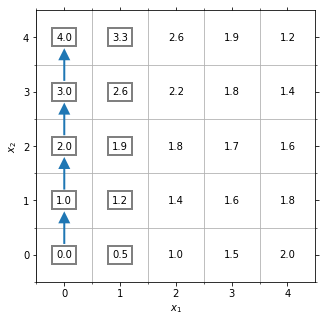

In [5]:
import matplotlib.ticker as ticker

def visualize_path(evaluated_sx, steps):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlim(-.5, size - .5)
    ax.set_ylim(-.5, size - .5)
    
    for i in range(size):
        for j in range(size):
            if (i, j) in evaluated_xs:
                ax.text(i, j, '%.1f'%(f(i, j)), ha='center', va='center',
                       bbox=dict(edgecolor='gray', facecolor='none', linewidth=2))
            else:
                ax.text(i, j, '%.1f'%(f(i, j)), ha='center', va='center')
                
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.xaxis.set_minor_locator(ticker.FixedLocator(np.arange(-.5, size - .5 ,1)))
    ax.yaxis.set_minor_locator(ticker.FixedLocator(np.arange(-.5, size - .5, 1)))
    
    plt.tick_params(axis='both', which='both', bottom='off', top='off',
                    left='off', right='off', labelbottom='off', labelleft='off')
    
    ax.grid(True, which='minor')
    ax.grid(False, which='major')
    
    for step in steps:
        ax.annotate('', xy=step[1], xytext=step[0],
                   arrowprops=dict(shrink=0.2, width=2, lw=0))
        
        
visualize_path(evaluated_xs, steps)

(4, 2) -> (4, 1)
(4, 1) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)


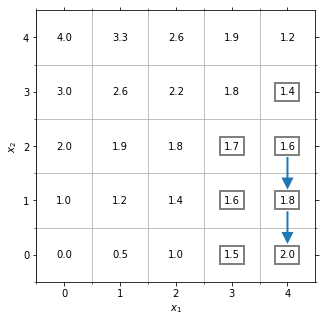

In [6]:
init_x = (4, 2)
init_f = f(init_x[0], init_x[1])
hc = HillClimbing(init_x, init_f)

evaluated_xs = {init_x}
steps = []

for _ in range(6):
    neighbor_xs = hc.get_neighbors()
    neighbor_fs = [f(x[0], x[1]) for x in neighbor_xs]
    step = hc.update(neighbor_xs, neighbor_fs)
    
    print('%s -> %s' % (step))
    steps.append(step)
    evaluated_xs.update(neighbor_xs)
    
visualize_path(evaluated_xs, steps)

In [7]:
#메타휴리스틱 => 언덕오르기 알고리즘과 다르게 전역 최적 솔루션을 찾아냄.

#확률적 언덕 오르기 알고리: 근방 솔루션을 모두 평가하지 말고 무작위로 선택된 근방 솔루션 한개만 평가.

import random

class RandomizedHillClimbing:
    
    def __init__(self, init_x, init_f):
        self.current_x = init_x
        self.current_f = init_f
        
    def get_neighbors(self):
              
        neighbor_xs = []
        
        for i, xi in enumerate(self.current_x):
            neighbor_x = list(self.current_x)
            neighbor_x[i] += 1
            if is_valid(neighbor_x):
                neighbor_xs.append(tuple(neighbor_x))
                
            neighbor_x = list(self.current_x)
            neighbor_x[i] -= 1
            if is_valid(neighbor_x):
                neighbor_xs.append(tuple(neighbor_x))

        return neighbor_xs
    
    
    def get_neighbor(self):
        """ 무작위로 근방 솔루션을 선택
            Returns:
                근방 솔루션
        """
        
        return random.choice(self.get_neighbors())
    
    
    def update(self, neighbor_x, neighbor_fs):
        old_x = self.current_x
        
        if self.current_f < neighbor_f:
            self.current_x = neighbor_x
            self.current_f = neighbor_f
        return (old_x, self.current_x)

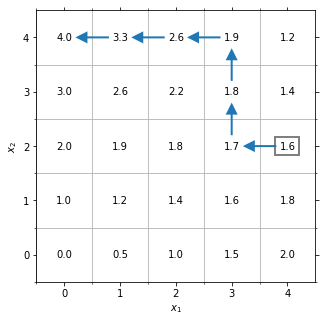

In [8]:
init_x = (4, 2)
init_f = f(init_x[0], init_x[1])
rhc = RandomizedHillClimbing(init_x, init_f)

evaluated_xs = {init_x}
steps = []

random.seed(0)

for _ in range(30):
    neighbor_x = rhc.get_neighbor()
    neighbor_f = f(neighbor_x[0], neighbor_x[1])
    step = rhc.update(neighbor_x, neighbor_f)
    
    steps.append(step)
    evaluated_xs.update(neighbor_x)
    
visualize_path(evaluated_xs, steps)

In [9]:
#시뮬레이티드 어닐링 : 근방 솔류션이 현재 솔루션보다 좋지 않아도 특정한 확률로 그 근방 솔루션을 받아 현재 솔루션을 업데이트

#파라미터 온도r : 현재 솔루션보다 좋지 않은 솔루션을 받아들이는 확률.
# => 초반에는 광범위한 솔루션 시험, 후반에는 성능이 우수한 솔루션으로 탐색 좁혀감.



class SimulatedAnnealing:
    
    def __init__(self, init_x, init_f):
        self.current_x = init_x
        self.current_f = init_f
        self.temperature = 10
        
    def get_neighbors(self):
              
        neighbor_xs = []
        
        for i, xi in enumerate(self.current_x):
            neighbor_x = list(self.current_x)
            neighbor_x[i] += 1
            if is_valid(neighbor_x):
                neighbor_xs.append(tuple(neighbor_x))
                
            neighbor_x = list(self.current_x)
            neighbor_x[i] -= 1
            if is_valid(neighbor_x):
                neighbor_xs.append(tuple(neighbor_x))

        return neighbor_xs
    
    
    def get_neighbor(self):
        """ 무작위로 근방 솔루션을 선택
            Returns:
                근방 솔루션
        """
        
        return random.choice(self.get_neighbors())
    
    
    def accept_prob(self, f):
        return np.exp((f - self.current_f) / max(self.temperature, 0.01))
    
    
    def update(self, neighbor_x, neighbor_fs):
        old_x = self.current_x
        
        if random.random() < self.accept_prob(neighbor_f):
            self.current_x = neighbor_x
            self.current_f = neighbor_f
        self.temperature *= 0.8   #냉각 스케줄
        
        return (old_x, self.current_x)


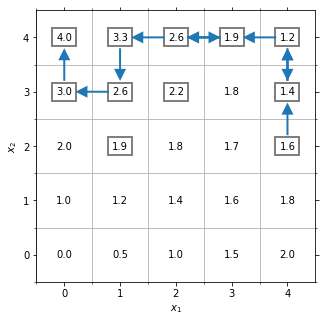

In [10]:
init_x = (4, 2)
init_f = f(init_x[0], init_x[1])
sa = SimulatedAnnealing(init_x, init_f)

evaluated_xs = {init_x}
steps = []

random.seed(0)
for _ in range(30):
    neighbor_x = sa.get_neighbor()
    evaluated_xs.add(neighbor_x)
    neighbor_f = f(neighbor_x[0], neighbor_x[1])
    step = sa.update(neighbor_x, neighbor_f)
    
    steps.append(step)
    
visualize_path(evaluated_xs, steps)

In [33]:
# 유전 알고리즘 : 솔루션을 생물 개체로 보고, 그 사이의 자연 도태의 형태를 의사적으로 재현
# 그 결과 가장 잘 적응한 개체 = 최적 솔루션을 구함
# 각 개체가 교차/돌연변이를 반복함으로써 환경에 적응한 개체를 나타내는 유전자를 발견


# 도태 / 교차 / 돌연변이
# 무작위 N개 솔루션 생성 => 평가 => 평가값이 큰 솔루션 선택
# => 선택된 솔루션에 교차조작 및 돌연변이 조작 추가 (다음세대 솔루션 집합)
# => 종료 조건 만족하면 종료. 만족하지 못하면 다시 평가하고 평가값 높은 솔루션 선택, 조작 추가 반복

# 엘리트 유지 전략 : 평가값이 높은 솔루션만 선택
# 룰렛 전략 : 평갓값에 따라 솔루션 선택할 확률을 결정

# 교차 조작 : 선택된 솔루션의 일부 유전자를 교환하는 개념.
# 즉, 선택된 솔루션의 일부를 서로 교환해서 새로운 솔루션을 생성함. 
# 교환할 비트열 추출은 무작위로 결정하며, 교차 조작을 실시할 솔루션의 비율을 교차율이라고 함. 교차율은 최적화 성능을 좌우하는 파라미터

# 돌연변이 조작 : 솔루션에 무작위로 변화를 삽입.
# 무작위로 솔루션을 선택하고, 무작위로 선택된 요소를 바꿈.
# 돌연변이 조작을 수행한 솔루션의 비율 = 돌연변이율


In [44]:
np.random.seed(0)
N = 10
size = 8
solutions = [np.random.randint(0, 2, size=size*size // 2) for _ in range(N)]

In [45]:
def represent(solution):
    return np.hstack((
            solution.reshape(size, size // 2),
            solution.reshape(size, size // 2)[:, ::1]
    ))

In [46]:
def visualize(solutions):
    rows = 2
    cols = N // rows
    i = 0
    for row in range(rows):
        for col in range(cols):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(represent(solutions[i]))
            plt.axis('off')
            plt.title(i)
            i += 1

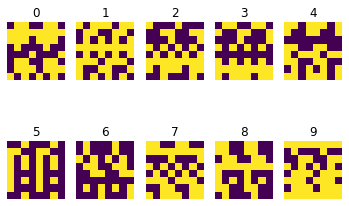

In [47]:
visualize(solutions)
plt.show()

In [48]:
#교차 조작
def crossover(sol1, sol2):
    thres = np.random.randint(0, size * size //2)
    new_solution = np.hstack((sol1[:thres], sol2[thres:]))
    return new_solution

In [52]:
#돌연변이 조작
def mutation(solution):
    mut = np.random.randint(0, size * size // 2)
    new_solution = solution.copy()
    new_solution[mut] = (new_solution[mut] + 1) % 2
    return new_solution

In [50]:
np.random.randint(0, size * size // 2)

9

In [53]:
#세대변경
def new_generation(parents, mut_n=3):  
    # parents : 도태 조작 결과 선택된 부모가 되는 솔루션 집합
    # mut_n : 돌연변이를 일으킬 개체 수
    solutions = []
    for _ in range(N):
        [i, j] = np.random.choice(range(len(parents)), 2, replace=False)
        child = crossover(parents[i], parents[j])
        solutions.append(child)
        
    for i in range(mut_n):
        solutions[i] = mutation(solutions[i])
    
    return solutions

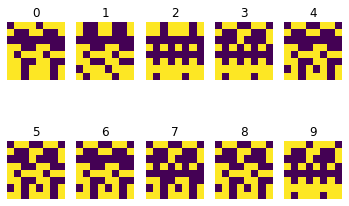

In [54]:
solutions = new_generation([
    solutions[3], solutions[4]
])

visualize(solutions)
plt.show()

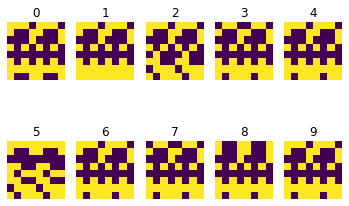

In [55]:
solutions = new_generation([
    solutions[1], solutions[3], solutions[9]
])

visualize(solutions)
plt.show()

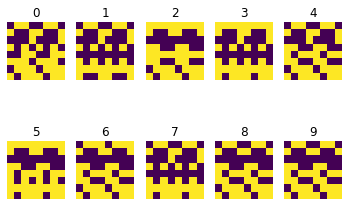

In [56]:
solutions = new_generation([
    solutions[3], solutions[5]
])

visualize(solutions)
plt.show()